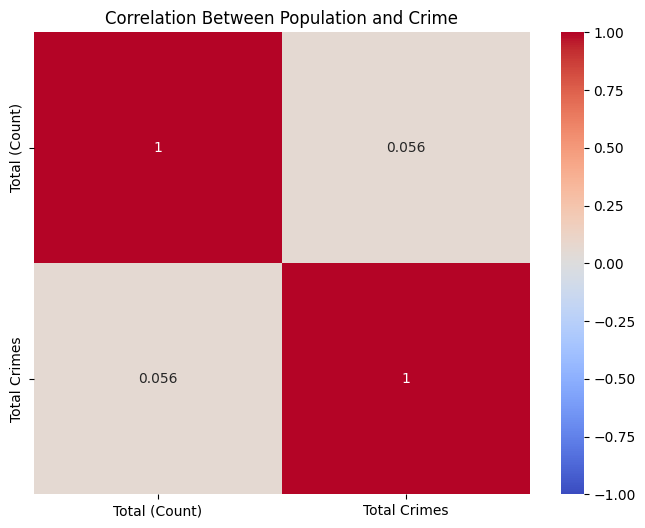

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_population = pd.read_csv(r'd:\ADRIAN\projects\berlin_project\berlin_data\criminal_data.csv', engine='pyarrow')
df_criminal = pd.read_csv(r'd:\ADRIAN\projects\berlin_project\berlin_data\cleaned_neighborhood_population_data.csv', engine='pyarrow')
 
# Step 1: Merge the population and crime data on 'Borough'
# Assuming 'Borough' exists in both datasets
df_merged = pd.merge(df_population, df_criminal, on='Borough', how='inner')

# Step 2: Calculate correlation matrix for population and crime
correlation_matrix = df_merged[['Total (Count)', 'Total Crimes']].corr()  # Adjust column names as necessary

# Step 3: Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Population and Crime')
plt.show()




Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\moroi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel\ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\encodings\cp12

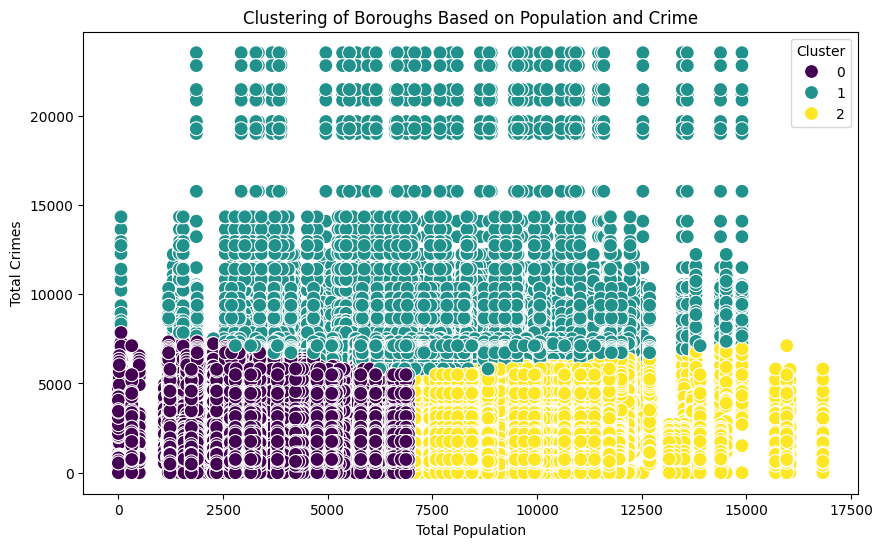

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
cluster_data = df_merged[['Total (Count)', 'Total Crimes']].copy()

# Standardize the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust number of clusters as needed
df_merged['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total (Count)', y='Total Crimes', hue='Cluster', data=df_merged, palette='viridis', s=100)
plt.title("Clustering of Boroughs Based on Population and Crime")
plt.xlabel("Total Population")
plt.ylabel("Total Crimes")
plt.legend(title='Cluster')
plt.show()


Age Summary Statistics by Cluster
            Under 6                                   6and 15              \
               mean         std median  min   max        mean         std   
Cluster                                                                     
0        251.632153  112.101302  252.0    0   591  376.571785  166.006391   
1        413.368580  161.693672  425.0    0   952  581.590858  242.312898   
2        530.768799  151.244960  512.0  228  1162  806.590639  249.292070   

                           ...    55 and 65                                 \
        median  min   max  ...         mean         std  median  min   max   
Cluster                    ...                                               
0        354.0    0   856  ...   616.094395  274.483672   581.0    0  1473   
1        565.0    3  1777  ...   930.374105  374.100456   929.0    9  2289   
2        756.0  335  1859  ...  1286.947022  314.538788  1242.0  582  2363   

         65 and more              

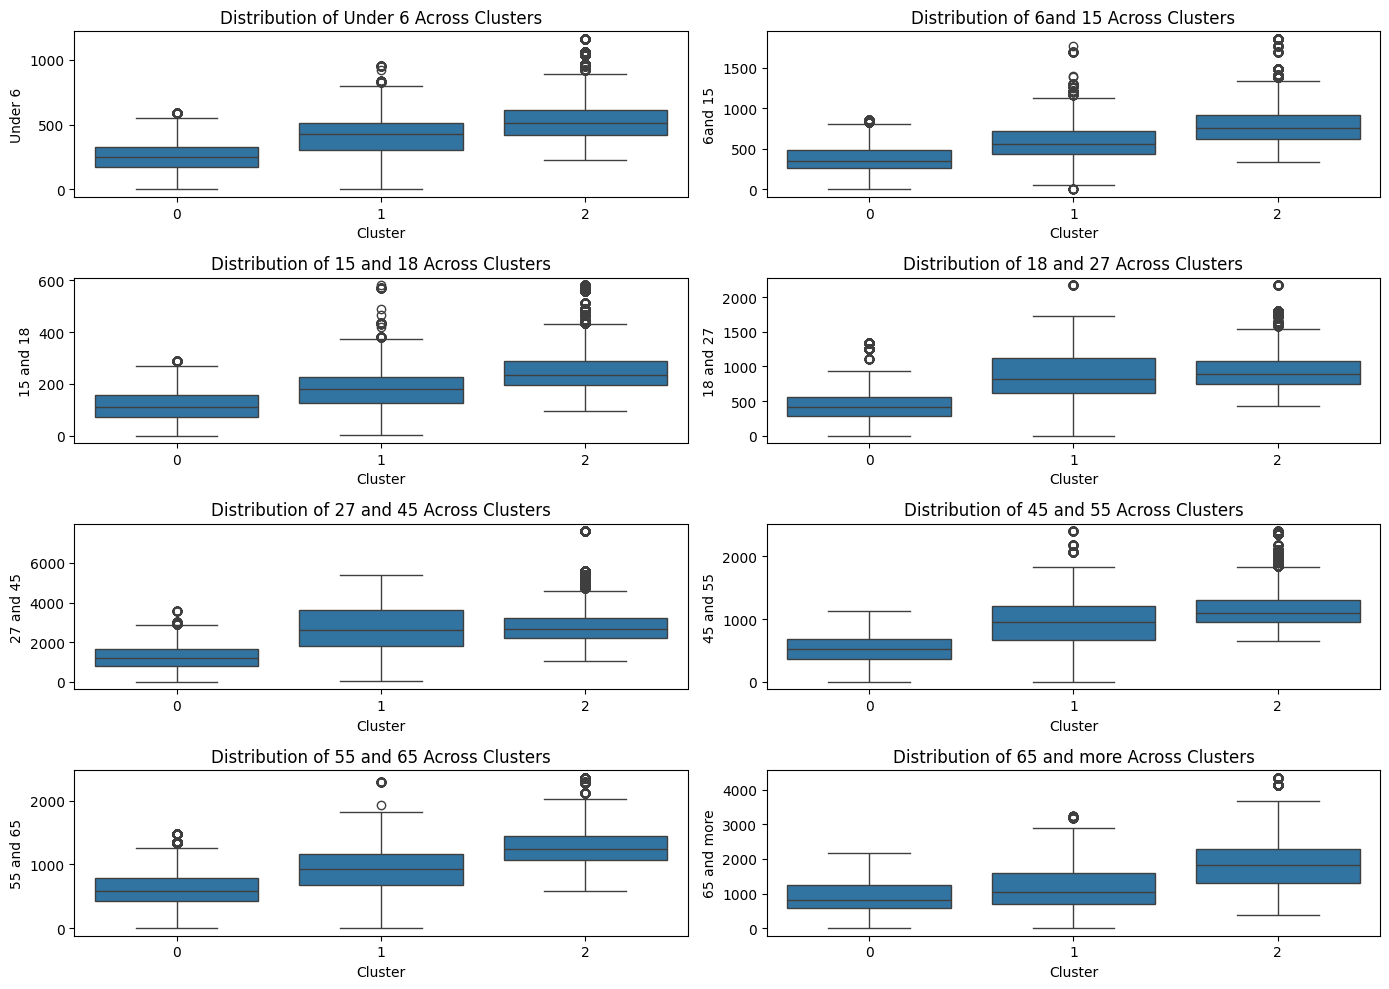

C:\Users\moroi\AppData\Local\Temp\ipykernel_23240\1730800407.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_merged, x='Cluster', y=age_group, inner="quartile", palette="muted")
C:\Users\moroi\AppData\Local\Temp\ipykernel_23240\1730800407.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_merged, x='Cluster', y=age_group, inner="quartile", palette="muted")
C:\Users\moroi\AppData\Local\Temp\ipykernel_23240\1730800407.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_merged, x='Cluster', y=age_group, 

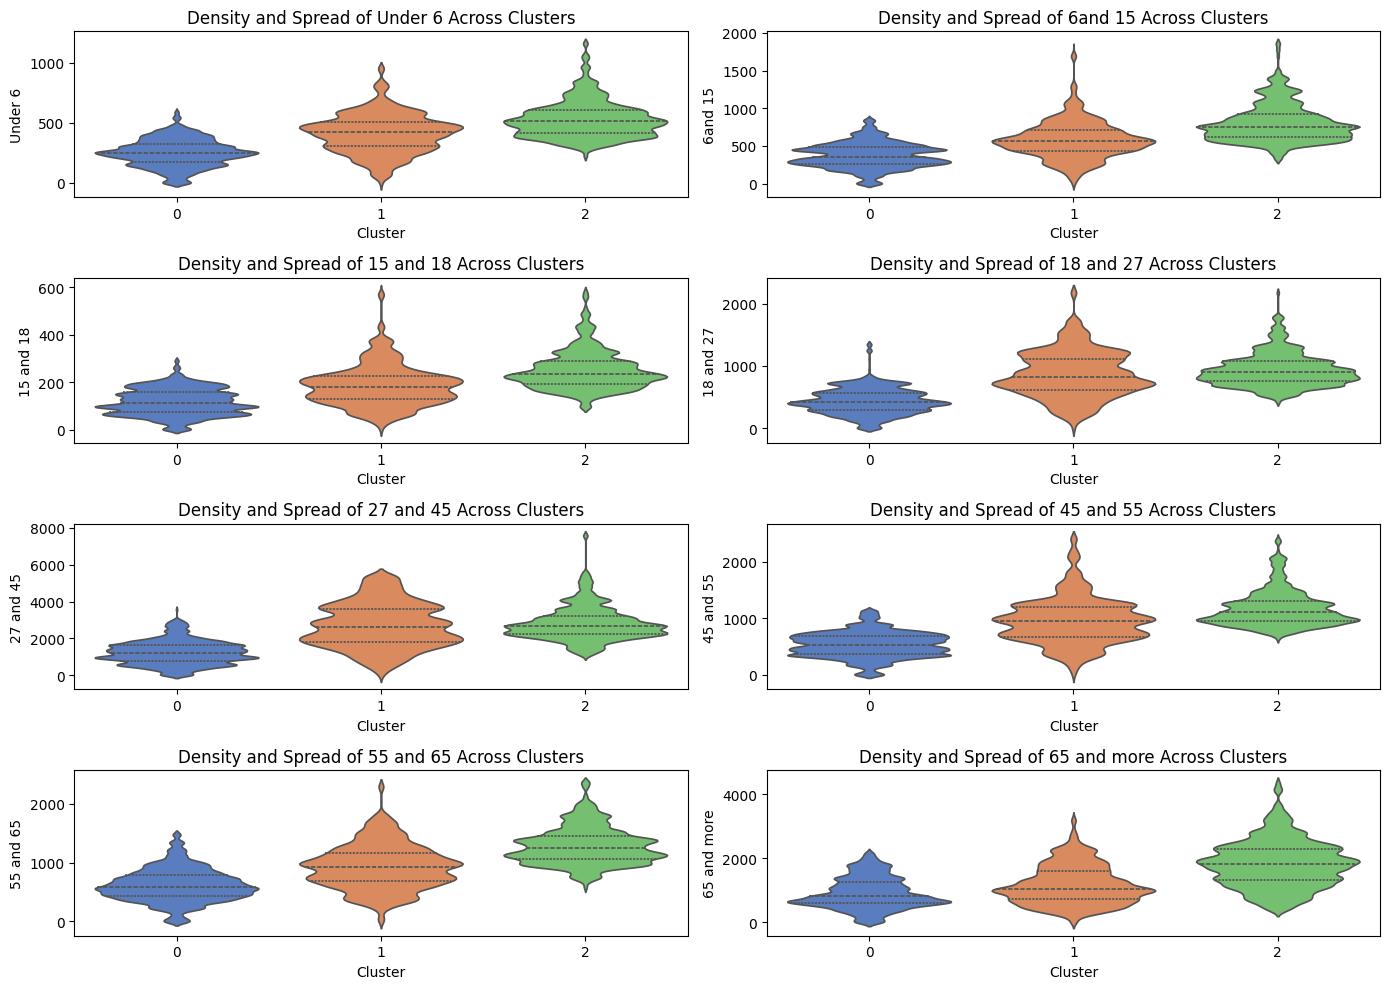

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate summary statistics by cluster for each age group
age_columns = ['Under 6', '6and 15', '15 and 18', '18 and 27', '27 and 45', '45 and 55', '55 and 65', '65 and more']
age_summary = df_merged.groupby('Cluster')[age_columns].agg(['mean', 'std', 'median', 'min', 'max'])

# Display the age summary statistics
print("Age Summary Statistics by Cluster")
print(age_summary)

# Visualize age distribution with box plots for each age group by cluster
plt.figure(figsize=(14, 10))
for i, age_group in enumerate(age_columns, start=1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df_merged, x='Cluster', y=age_group)
    plt.title(f"Distribution of {age_group} Across Clusters")
    plt.tight_layout()

plt.show()

# Alternative: Violin plots to show distribution density for each age group by cluster
plt.figure(figsize=(14, 10))
for i, age_group in enumerate(age_columns, start=1):
    plt.subplot(4, 2, i)
    sns.violinplot(data=df_merged, x='Cluster', y=age_group, inner="quartile", palette="muted")
    plt.title(f"Density and Spread of {age_group} Across Clusters")
    plt.tight_layout()

plt.show()


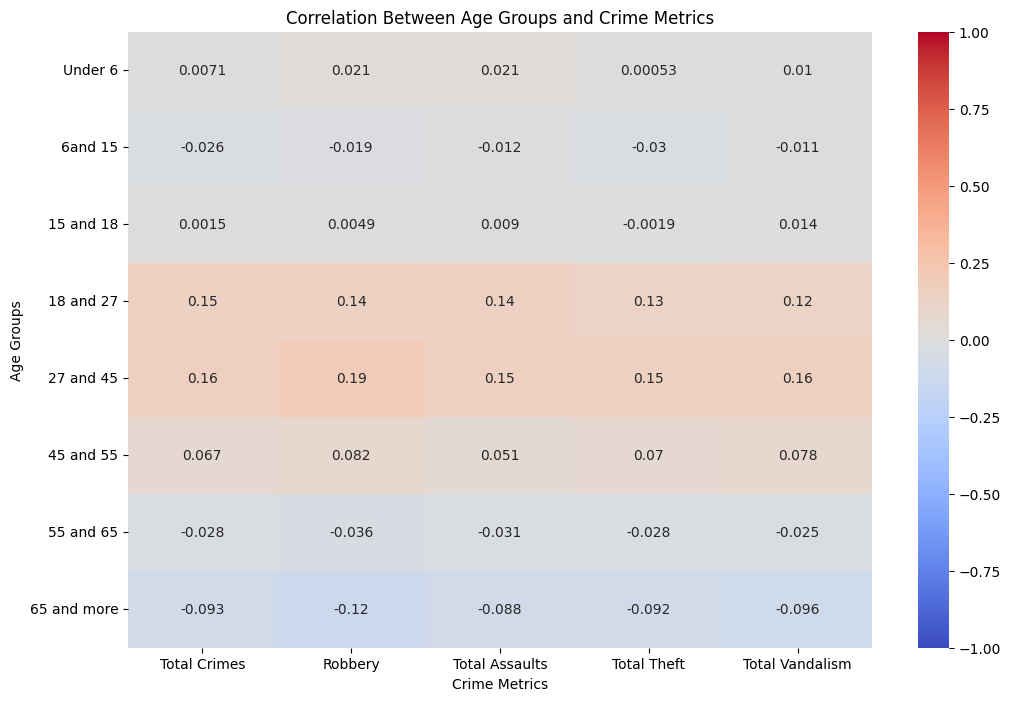

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the age distribution data with the crime data on 'Cluster' or 'Borough' as appropriate
df_analysis = pd.merge(df_population, df_criminal, on='Borough', how='inner')  # Adjust 'Cluster' if needed

# Calculate correlation between age groups and crime metrics
age_columns = ['Under 6', '6and 15', '15 and 18', '18 and 27', '27 and 45', '45 and 55', '55 and 65', '65 and more']
crime_columns = ['Total Crimes', 'Robbery', 'Total Assaults','Total Theft','Total Vandalism']  # Replace with actual crime columns

# Correlation matrix
correlation_matrix = df_analysis[age_columns + crime_columns].corr()

# Display correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.loc[age_columns, crime_columns], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Age Groups and Crime Metrics")
plt.xlabel("Crime Metrics")
plt.ylabel("Age Groups")
plt.show()




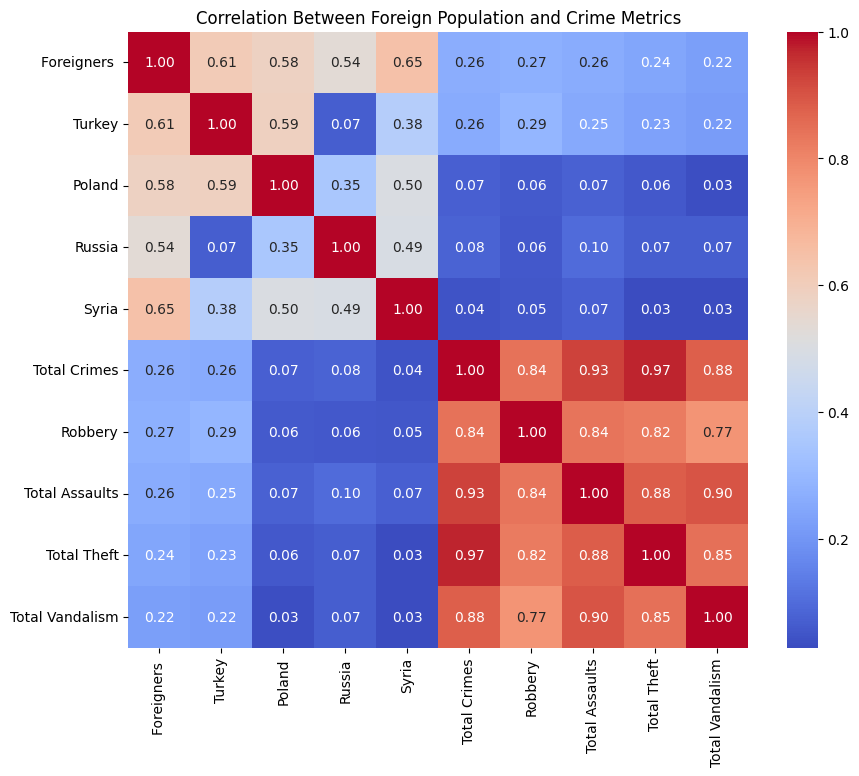

,Foreigners,Turkey,Poland,Russia,Syria,Total Crimes,Robbery,Total Assaults,Total Theft,Total Vandalism
Foreigners,1.000000,0.612314,0.584893,0.535666,0.646688,0.264498,0.274223,0.262321,0.241766,0.224070
Turkey,0.612314,1.000000,0.588116,0.065943,0.384624,0.255946,0.292427,0.254599,0.230040,0.216257
Poland,0.584893,0.588116,1.000000,0.354200,0.499704,0.071934,0.060827,0.074400,0.057423,0.033422
Russia,0.535666,0.065943,0.354200,1.000000,0.492877,0.080385,0.056268,0.098463,0.069539,0.069107
Syria,0.646688,0.384624,0.499704,0.492877,1.000000,0.043816,0.051169,0.070917,0.027928,0.028820
Total Crimes,0.264498,0.255946,0.071934,0.080385,0.043816,1.000000,0.840835,0.929761,0.970528,0.879815
Robbery,0.274223,0.292427,0.060827,0.056268,0.051169,0.840835,1.000000,0.838909,0.824639,0.770533
Total Assaults,0.262321,0.254599,0.074400,0.098463,0.070917,0.929761,0.838909,1.000000,0.882882,0.900182
Total Theft,0.241766,0.230040,0.057423,0.069539,0.027928,0.970528,0.824639,0.882882,1.000000,0.845159
Total Vandalism,0.224070,0.216257,0.033422,0.069107,0.028820,0.879815,0.770533,0.900182,0.845159,1.000000


In [12]:





# Select relevant columns related to foreign population and crime metrics
columns_of_interest = [
    'Foreigners ', 'Turkey', 'Poland', 'Russia', 'Syria',  # Foreign population columns
    'Total Crimes', 'Robbery', 'Total Assaults', 'Total Theft', 'Total Vandalism'  # Crime data columns
]

# Filter for the relevant columns in the merged dataset
data_for_correlation = df_merged[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Foreign Population and Crime Metrics')
plt.show()

correlation_matrix
